In [341]:
import pandas as pd
import numpy as np

In [342]:
df_train = pd.read_excel(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 3\Flight Price Prediction\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [343]:
df_test = pd.read_excel(r"C:\Users\AMITHK\Downloads\Data Trained\Projects\Week 3\Flight Price Prediction\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [344]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [345]:
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [346]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [347]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [348]:
# We will distribute time into 4 zones
# 0 to 6 --  Midnight

# 6 to 12 -- Morning

# 12 to 18 -- Afternoon

# 18 to 24 -- Night

In [349]:
df_train['Arrival_Time'] = df_train.Arrival_Time.str.split(':', n=1).str[0].astype(int)

In [350]:
df_test['Arrival_Time'] = df_test.Arrival_Time.str.split(':', n=1).str[0].astype(int)

In [351]:
df_train['Dep_Time'] = df_train.Dep_Time.str.split(':', n=1).str[0].astype(int)

In [352]:
df_test['Dep_Time'] = df_test.Dep_Time.str.split(':', n=1).str[0].astype(int)

In [353]:
df_train['Arrival_Time'] = df_train.apply(lambda x: 'Midnight' if 0 < x['Arrival_Time'] <= 6 else 'Morning' 
                                          if 6 < x['Arrival_Time'] <= 12 else 'Afternoon'
                                          if 12 < x['Arrival_Time'] <= 18 else 'Night',axis=1)


In [354]:
df_train['Dep_Time'] = df_train.apply(lambda x: 'Midnight' if 0 < x['Dep_Time'] <= 6 else 'Morning' 
                                          if 6 < x['Dep_Time'] <= 12 else 'Afternoon'
                                          if 12 < x['Dep_Time'] <= 18 else 'Night',axis=1)

In [355]:
df_test['Arrival_Time'] = df_test.apply(lambda x: 'Midnight' if 0 < x['Arrival_Time'] <= 6 else 'Morning' 
                                          if 6 < x['Arrival_Time'] <= 12 else 'Afternoon'
                                          if 12 < x['Arrival_Time'] <= 18 else 'Night',axis=1)


In [356]:
df_test['Dep_Time'] = df_test.apply(lambda x: 'Midnight' if 0 < x['Dep_Time'] <= 6 else 'Morning' 
                                          if 6 < x['Dep_Time'] <= 12 else 'Afternoon'
                                          if 12 < x['Dep_Time'] <= 18 else 'Night',axis=1)

In [357]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,Night,Midnight,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,Midnight,Afternoon,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Midnight,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,Afternoon,Night,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,Night,Night,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,Night,Night,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,Morning,Morning,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,Morning,Afternoon,2h 40m,non-stop,No info,12648


In [358]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,Afternoon,Midnight,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,Midnight,Morning,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,Night,Night,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,Morning,Night,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,Night,Midnight,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,Night,Night,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,Afternoon,Afternoon,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,Night,Midnight,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,Midnight,Night,15h 15m,1 stop,No info


In [359]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [360]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [361]:
df_train['Total_Stops'] = df_train['Total_Stops'].apply(lambda x: int(x[0]) if x[0]!='n' else 0)

df_test['Total_Stops'] = df_test['Total_Stops'].apply(lambda x: int(x[0]) if x[0]!='n' else 0)

In [362]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,Night,Midnight,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,Midnight,Afternoon,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Midnight,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,Afternoon,Night,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,Afternoon,Night,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,Night,Night,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,Night,Night,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,Morning,Morning,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,Morning,Afternoon,2h 40m,0,No info,12648


In [363]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,Afternoon,Midnight,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,Midnight,Morning,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,Night,Night,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,Morning,Night,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,Night,Midnight,2h 50m,0,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,Night,Night,23h 55m,1,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,Afternoon,Afternoon,2h 35m,0,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,Night,Midnight,6h 35m,1,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,Midnight,Night,15h 15m,1,No info


In [364]:
# Let us transform date of Journey into weekdays and month

df_train['Week'] = pd.to_datetime(df_train['Date_of_Journey']).dt.dayofweek
df_train['Month'] = df_train['Date_of_Journey'].apply(lambda x: int(x.split('/')[1]))

df_test['Week'] = pd.to_datetime(df_test['Date_of_Journey']).dt.dayofweek
df_test['Month'] = df_test['Date_of_Journey'].apply(lambda x: int(x.split('/')[1]))



In [365]:
# Convert Duration to Hours

df_train['Hours'] = df_train['Duration'].apply(lambda x: x.split('h')[0])

In [366]:
df_test['Hours'] = df_test['Duration'].apply(lambda x: x.split('h')[0])

In [367]:
df_train['Hours'].unique()

# We are getting 5m in one row we have to check it

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [368]:
df_test['Hours'].unique()


array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [369]:
df_train[df_train['Hours'] == '5m']
# THere cannot be flight with 5m duration we can remove this 


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Week,Month,Hours
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,Afternoon,Afternoon,5m,2,No info,17327,0,3,5m


In [370]:
df_test[df_test['Hours'] == '5m']


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Week,Month,Hours
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,Afternoon,Afternoon,5m,2,No info,1,3,5m


In [371]:
df_train[(df_train['Source'] == 'Mumbai' ) & (df_train['Destination'] == 'Hyderabad') & (df_train['Total_Stops'] == 2) & 
         (df_train['Price'] == 17327)]

# Let's change the time to 4h 15m

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Week,Month,Hours
5309,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,Night,Afternoon,4h 15m,2,No info,17327,0,3,4
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,Afternoon,Afternoon,5m,2,No info,17327,0,3,5m


In [372]:
df_test.at[2660,'Duration'] = '4h 15m'
df_test.at[2660,'Hours'] = '4'

In [373]:
df_train.at[6474,'Duration'] = '4h 15m'
df_train.at[6474,'Hours'] = '4'

In [374]:
df_train['Hours'].unique()


array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [375]:
df_test['Hours'].unique()


array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40'], dtype=object)

In [376]:
df_train['Minutes'] = df_train['Duration'].apply(lambda x: x.split('h')[1])

In [377]:
df_test['Minutes'] = df_test['Duration'].apply(lambda x: x.split('h')[1])

In [378]:
df_train['Minutes'].unique()

array([' 50m', ' 25m', '', ' 45m', ' 30m', ' 5m', ' 15m', ' 35m', ' 10m',
       ' 20m', ' 55m', ' 40m'], dtype=object)

In [379]:
df_test['Minutes'].unique()

array([' 55m', '', ' 45m', ' 50m', ' 20m', ' 5m', ' 15m', ' 40m', ' 10m',
       ' 35m', ' 30m', ' 25m'], dtype=object)

In [380]:
df_train['Minutes'] = df_train['Minutes'].replace('','0m')


In [381]:
df_test['Minutes'] = df_test['Minutes'].replace('','0m')


In [382]:

df_train['Minutes'] = df_train['Minutes'].apply(lambda x: x.split('m')[0])

In [383]:
df_test['Minutes'] = df_test['Minutes'].apply(lambda x: x.split('m')[0])

In [384]:
df_train['Travel_Time'] = df_train['Hours'].astype(int) + df_train['Minutes'].astype(int)/60

In [385]:
df_test['Travel_Time'] = df_test['Hours'].astype(int) + df_test['Minutes'].astype(int)/60

In [386]:
df_train = df_train.drop(['Duration','Hours','Date_of_Journey','Minutes','Route','Additional_Info'],axis=1)

In [387]:
df_test = df_test.drop(['Duration','Hours','Date_of_Journey','Minutes','Route','Additional_Info'],axis=1)

In [388]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Week,Month,Travel_Time
0,IndiGo,Banglore,New Delhi,Night,Midnight,0,3897,6,3,2.833333
1,Air India,Kolkata,Banglore,Midnight,Afternoon,2,7662,5,5,7.416667
2,Jet Airways,Delhi,Cochin,Morning,Midnight,2,13882,4,6,19.000000
3,IndiGo,Kolkata,Banglore,Afternoon,Night,1,6218,3,5,5.416667
4,IndiGo,Banglore,New Delhi,Afternoon,Night,1,13302,3,3,4.750000


In [389]:
df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Week,Month,Travel_Time
0,Jet Airways,Delhi,Cochin,Afternoon,Midnight,1,3,6,10.916667
1,IndiGo,Kolkata,Banglore,Midnight,Morning,1,3,5,4.000000
2,Jet Airways,Delhi,Cochin,Night,Night,1,1,5,23.750000
3,Multiple carriers,Delhi,Cochin,Morning,Night,1,1,5,13.000000
4,Air Asia,Banglore,Delhi,Night,Midnight,0,0,6,2.833333


In [390]:
df_train['Source'].unique()


array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [391]:
df_train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [392]:
df_train['Destination'] = df_train['Destination'].str.replace('New Delhi','Delhi')

In [393]:
df_train['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [394]:
df_test['Destination'].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [395]:
df_test['Source'].unique()


array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [396]:
df_test['Destination'] = df_test['Destination'].str.replace('New Delhi','Delhi')

In [397]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [398]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [399]:
df_train['Travel_From_To'] = df_train['Source'] + '-' + df_train['Destination']

In [400]:
df_train['Travel_From_To'].value_counts()

Delhi-Cochin        4536
Kolkata-Banglore    2871
Banglore-Delhi      2197
Mumbai-Hyderabad     697
Chennai-Kolkata      381
Name: Travel_From_To, dtype: int64

In [401]:
df_test['Travel_From_To'] = df_test['Source'] + '-' + df_test['Destination']

In [402]:
df_test['Travel_From_To'].value_counts()

Delhi-Cochin        1145
Kolkata-Banglore     710
Banglore-Delhi       555
Mumbai-Hyderabad     186
Chennai-Kolkata       75
Name: Travel_From_To, dtype: int64

In [403]:
df_train = df_train.drop(['Source','Destination'],axis=1)
df_test = df_test.drop(['Source','Destination'],axis=1)

In [404]:
df_train

,Airline,Dep_Time,Arrival_Time,Total_Stops,Price,Week,Month,Travel_Time,Travel_From_To
0,IndiGo,Night,Midnight,0,3897,6,3,2.833333,Banglore-Delhi
1,Air India,Midnight,Afternoon,2,7662,5,5,7.416667,Kolkata-Banglore
2,Jet Airways,Morning,Midnight,2,13882,4,6,19.000000,Delhi-Cochin
3,IndiGo,Afternoon,Night,1,6218,3,5,5.416667,Kolkata-Banglore
4,IndiGo,Afternoon,Night,1,13302,3,3,4.750000,Banglore-Delhi
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Night,Night,0,4107,2,4,2.500000,Kolkata-Banglore
10679,Air India,Night,Night,0,4145,5,4,2.583333,Kolkata-Banglore
10680,Jet Airways,Morning,Morning,0,7229,5,4,3.000000,Banglore-Delhi
10681,Vistara,Morning,Afternoon,0,12648,3,3,2.666667,Banglore-Delhi


In [405]:
df_test

,Airline,Dep_Time,Arrival_Time,Total_Stops,Week,Month,Travel_Time,Travel_From_To
0,Jet Airways,Afternoon,Midnight,1,3,6,10.916667,Delhi-Cochin
1,IndiGo,Midnight,Morning,1,3,5,4.000000,Kolkata-Banglore
2,Jet Airways,Night,Night,1,1,5,23.750000,Delhi-Cochin
3,Multiple carriers,Morning,Night,1,1,5,13.000000,Delhi-Cochin
4,Air Asia,Night,Midnight,0,0,6,2.833333,Banglore-Delhi
...,...,...,...,...,...,...,...,...
2666,Air India,Night,Night,1,3,6,23.916667,Kolkata-Banglore
2667,IndiGo,Afternoon,Afternoon,0,2,3,2.583333,Kolkata-Banglore
2668,Jet Airways,Night,Midnight,1,0,3,6.583333,Delhi-Cochin
2669,Air India,Midnight,Night,1,0,3,15.250000,Delhi-Cochin


In [406]:
cat_col = ['Airline','Dep_Time','Arrival_Time','Travel_From_To']

from sklearn.preprocessing import LabelEncoder
for cat in cat_col:
    encoder = LabelEncoder()
    df_train[cat] = encoder.fit_transform(df_train[cat])
    df_test[cat] = encoder.transform(df_test[cat])


In [407]:
df_train

,Airline,Dep_Time,Arrival_Time,Total_Stops,Price,Week,Month,Travel_Time,Travel_From_To
0,3,3,1,0,3897,6,3,2.833333,0
1,1,1,0,2,7662,5,5,7.416667,3
2,4,2,1,2,13882,4,6,19.000000,2
3,3,0,3,1,6218,3,5,5.416667,3
4,3,0,3,1,13302,3,3,4.750000,0
...,...,...,...,...,...,...,...,...,...
10678,0,3,3,0,4107,2,4,2.500000,3
10679,1,3,3,0,4145,5,4,2.583333,3
10680,4,2,2,0,7229,5,4,3.000000,0
10681,10,2,0,0,12648,3,3,2.666667,0


In [408]:
df_test

,Airline,Dep_Time,Arrival_Time,Total_Stops,Week,Month,Travel_Time,Travel_From_To
0,4,0,1,1,3,6,10.916667,2
1,3,1,2,1,3,5,4.000000,3
2,4,3,3,1,1,5,23.750000,2
3,6,2,3,1,1,5,13.000000,2
4,0,3,1,0,0,6,2.833333,0
...,...,...,...,...,...,...,...,...
2666,1,3,3,1,3,6,23.916667,3
2667,3,0,0,0,2,3,2.583333,3
2668,4,3,1,1,0,3,6.583333,2
2669,1,1,3,1,0,3,15.250000,2


In [409]:
from sklearn.model_selection import train_test_split

X=df_train.drop(['Price'],axis=1).values
y = df_train['Price'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)


# Logistic Regression

In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

LRmodel = LinearRegression()
LRmodel.fit(X_train,y_train)
predictions = LRmodel.predict(X_test)

test_score = r2_score(y_test,predictions)

In [411]:

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  40.86400053237732
MAE for testing set: 2486.2331204921365
MSE for testing set: 12041616.643308543
RMSE for testing set: 3470.103261188137


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

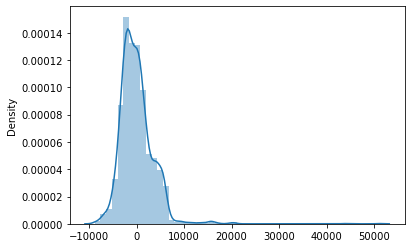

In [412]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50)

# Support Vector Regressor

In [438]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)

test_score = r2_score(y_test,predictions)

In [439]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  13.786577426530677
MAE for testing set: 3128.711757520321
MSE for testing set: 17555279.245862305
RMSE for testing set: 4189.902056834062


# Decision Tree Regressor

In [413]:
from sklearn.tree import DecisionTreeRegressor


dtree = DecisionTreeRegressor(min_samples_split=10)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

test_score = r2_score(y_test,predictions)

In [414]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))


The accuracy of testing dataset  55.32173644280161
MAE for testing set: 1572.5764171804965
MSE for testing set: 9097648.249591911
RMSE for testing set: 3016.2308017775945


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

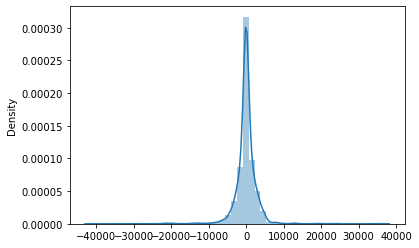

In [415]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50)

# Random Forest Regressor

In [416]:
from sklearn.ensemble import RandomForestRegressor


reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)
predictions = reg_rf.predict(X_test)

test_score = r2_score(y_test,predictions)

In [417]:
print("The accuracy of testing dataset ",test_score*100)
print('MAE for testing set: {}'.format(mean_absolute_error(predictions,y_test)))
print('MSE for testing set: {}'.format(mean_squared_error(predictions,y_test)))
print('RMSE for testing set: {}'.format(np.sqrt(mean_squared_error(predictions,y_test))))

The accuracy of testing dataset  63.638431199962476
MAE for testing set: 1545.7035964491592
MSE for testing set: 7404154.423382447
RMSE for testing set: 2721.0575928088047


C:\Users\AMITHK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

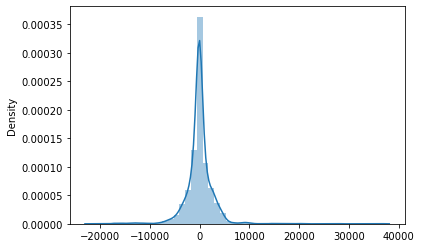

In [427]:
sns.distplot((y_test-predictions),bins=50)


# HyperParameter Tuning

In [430]:
from sklearn.model_selection import RandomizedSearchCV


#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [431]:

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [432]:
# random search of parameters, using 5 fold cross validation
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [433]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [437]:
predictions = rf_random.predict(X_test)

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 1467.6537705725466
MSE: 6252138.591262946
RMSE: 2500.427681670267


In [455]:
from pickle import dump
model = rf_random.best_estimator_
dump(model,open('model.pkl','wb'))
model

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [457]:
# Predictions on sample data

test_predictions = model.predict(df_test)

In [458]:
df_predictions = pd.DataFrame(predictions, columns = ['Price'])

In [459]:
df_predictions.to_excel('answers.xlsx',index = False)
